In [ ]:
# Object oriented programming

In [1]:
stuff=list()
stuff.append('python')
stuff.append('chuck')
stuff.sort()
print(stuff[0])

print(stuff.__getitem__(0))
print(list.__getitem__(stuff,0))

chuck
chuck
chuck


In [31]:
class PartyAnimal:
    x=0
    
    def party(self):
        self.x=self.x+1
        print("So far", self.x)
    def summation(self, PartyAnymal):
        print(self.x+PartyAnymal.x)
        #return len(self.x)

In [32]:
an=PartyAnimal()
print("Type", type(an))
print("Dir", dir(an))

an.party()
an.party()
an.party()

Type <class '__main__.PartyAnimal'>
Dir ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'party', 'summation', 'x']
So far 1
So far 2
So far 3


In [33]:
b=PartyAnimal()
b.party()
an.summation(b)

So far 1
4


## Object lifecycle

In [40]:
class PartyAnimal:
    x=0 
    def __init__(self):
        print("I am constructed")
    def party(self):
        self.x=self.x+1
        print("So far", self.x)        
    def __del__(self):
        print("I am destructed",self.x)

In [41]:
an=PartyAnimal()

an.party()

an.party()

an.party()

I am constructed
So far 1
So far 2
So far 3


In [42]:
an.x=32

In [43]:
an.party()

So far 33


In [44]:
an=42

I am destructed 33


In [39]:
type(an)

int

## Constructrors

In [19]:
class PartyAnimal:
    x=0
    name=""
    
    def __init__(self,nam):
        self.name=nam
        print self.name, "constructed"
        
    def party(self):
        self.x=self.x+1
        print self.name,"party count",self.x
        
s=PartyAnimal("Sally")
s.party()

j=PartyAnimal("Jim")
j.party()
s.party()

Sally constructed
Sally party count 1
Jim constructed
Jim party count 1
Sally party count 2


## Inheritance

In [20]:
class PartyAnimal:
    x=0
    name=""
    
    def __init__(self,nam):
        self.name=nam
        print self.name, "constructed"
        
    def party(self):
        self.x=self.x+1
        print self.name,"party count",self.x
        
class FootballFan(PartyAnimal):
    points=0
    def touchdown(self):
        self.points=self.points+7
        self.party()
        print self.name, "points", self.points

In [21]:
s=PartyAnimal("Sally")

Sally constructed


In [22]:
s.party()

Sally party count 1


In [23]:
j=FootballFan("Jim")

Jim constructed


In [24]:
j.party()

Jim party count 1


In [25]:
j.touchdown()

Jim party count 2
Jim points 7


## Week2, Relational Databases

In [ ]:
#we have a database sql1.db in working directory
#Creating a table
CREATE TABLE Users (
    name VARCHAR(128),
    email VARCHAR(128)
)

#CRUD: create read update delete

INSERT INTO Users (name, email) VALUES ('Kristin', 'kf@umich.edu')

DELETE FROM Users Where email='fred@umich.edu'

UPDATE Users SET name='Charles' WHERE email='csev@umich.edu'

SELECT * FROM Users

SELECT * FROM Users ORDER BY email

SELECT * FROM Users ORDER BY name
 

## twspider : storing twitter data in the database

In [47]:
from urllib.request import urlopen
import urllib.error
import twurl
import json
import sqlite3
import ssl


TWITTER_URL = 'https://api.twitter.com/1.1/friends/list.json'

conn = sqlite3.connect('spider.sqlite')
cur = conn.cursor()

cur.execute('''
            CREATE TABLE IF NOT EXISTS Twitter
            (name TEXT, retrieved INTEGER, friends INTEGER)''')
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

while True:
    acct = input('Enter a Twitter account, or quit: ')
    if (acct == 'quit'): break
    if (len(acct) < 1):
        cur.execute('SELECT name FROM Twitter WHERE retrieved = 0 LIMIT 1')
        try:
            acct = cur.fetchone()[0]
        except:
            print('No unretrieved Twitter accounts found')
            continue

    url = twurl.augment(TWITTER_URL, {'screen_name': acct, 'count': '5'})
    print('Retrieving', url)
    connection = urlopen(url, context=ctx)
    data = connection.read().decode()
    headers = dict(connection.getheaders())

    print('Remaining', headers['x-rate-limit-remaining'])
    js = json.loads(data)
    # Debugging
    # print json.dumps(js, indent=4)

    cur.execute('UPDATE Twitter SET retrieved=1 WHERE name = ?', (acct, ))

    countnew = 0
    countold = 0
    for u in js['users']:
        friend = u['screen_name']
        print(friend)
        cur.execute('SELECT friends FROM Twitter WHERE name = ? LIMIT 1',
                    (friend, ))
        try:
            count = cur.fetchone()[0]
            cur.execute('UPDATE Twitter SET friends = ? WHERE name = ?',
                        (count+1, friend))
            countold = countold + 1
        except:
            cur.execute('''INSERT INTO Twitter (name, retrieved, friends)
                        VALUES (?, 0, 1)''', (friend, ))
            countnew = countnew + 1
    print('New accounts=', countnew, ' revisited=', countold)
    conn.commit()

cur.close()

Enter a Twitter account, or quit: nyirock
Retrieving https://api.twitter.com/1.1/friends/list.json?oauth_timestamp=1500243880&oauth_signature=lZZ0Kd%2BvI%2BB5HWHHWQAviezjLQY%3D&screen_name=nyirock&count=5&oauth_consumer_key=4Se8J018D88z8jWQTOkRKQ5jY&oauth_nonce=74933877&oauth_signature_method=HMAC-SHA1&oauth_version=1.0&oauth_token=2789693187-XKWOu889GcaeU1BOERBvrRLvfbgvUVkV68da9MW
Remaining 14
lonelyplanet
NatGeoTravel
PopSci
sciencemagazine
NatGeoPhotos
New accounts= 5  revisited= 0
Enter a Twitter account, or quit: lonelyplanet
Retrieving https://api.twitter.com/1.1/friends/list.json?oauth_timestamp=1500243899&oauth_signature=Oe%2BTiso3llASVz1ikp4B2ET6F8Y%3D&screen_name=lonelyplanet&count=5&oauth_consumer_key=4Se8J018D88z8jWQTOkRKQ5jY&oauth_nonce=01036997&oauth_signature_method=HMAC-SHA1&oauth_version=1.0&oauth_token=2789693187-XKWOu889GcaeU1BOERBvrRLvfbgvUVkV68da9MW
Remaining 13
TeamHandstand
gregfoot
kaustubhyk
GBCedarPark
MegoYugo
New accounts= 5  revisited= 0
Enter a Twitter acc

assignment 1

In [ ]:
CREATE TABLE Ages ( 
  name VARCHAR(128), 
  age INTEGER
)

DELETE FROM Ages;
INSERT INTO Ages (name, age) VALUES ('Ainslie', 32);
INSERT INTO Ages (name, age) VALUES ('Hania', 27);
INSERT INTO Ages (name, age) VALUES ('Rahil', 31);
INSERT INTO Ages (name, age) VALUES ('Oluwademilade', 30);
INSERT INTO Ages (name, age) VALUES ('Hamish', 19);

SELECT hex(name || age) AS X FROM Ages ORDER BY X

In [57]:
#created and populated assignment1.db
import sqlite3
conn = sqlite3.connect('assignment1.db')
cur = conn.cursor()

cur.execute('''SELECT hex(name || age) AS X FROM Ages ORDER BY X''')
for row in cur:
    print(row)
cur.close()

('41696E736C69653332',)
('48616D6973683139',)
('48616E69613237',)
('4F6C75776164656D696C6164653330',)
('526168696C3331',)


In [55]:
print(data.fetchall)

<built-in method fetchall of sqlite3.Cursor object at 0x000000978A468A40>


To get credit for this assignment, perform the instructions below and upload your SQLite3 database here:
(Must have a .sqlite suffix)
Hint: The top organizational count is 536.
You do not need to export or convert the database - simply upload the .sqlite file that your program creates. See the example code for the use of the connect() statement. 

In [4]:
%%time
import sqlite3

conn = sqlite3.connect('emaildb.sqlite')
cur = conn.cursor()

cur.execute('''
DROP TABLE IF EXISTS Counts''')

cur.execute('''
CREATE TABLE Counts (email TEXT, count INTEGER)''')

fname = input('Enter file name: ')
if (len(fname) < 1): fname = 'mbox-short.txt'
fh = open(fname)
for line in fh:
    if not line.startswith('From: '): continue
    pieces = line.split()
    email = pieces[1]
    cur.execute('SELECT count FROM Counts WHERE email = ? ', (email,))
    row = cur.fetchone()
    if row is None:
        cur.execute('''INSERT INTO Counts (email, count)
                VALUES (?, 1)''', (email,))
    else:
        cur.execute('UPDATE Counts SET count = count + 1 WHERE email = ?',
                    (email,))
    conn.commit()

# https://www.sqlite.org/lang_select.html
sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'

for row in cur.execute(sqlstr):
    print(str(row[0]), row[1])

cur.close()


Enter file name: 
cwen@iupui.edu 5
zqian@umich.edu 4
david.horwitz@uct.ac.za 4
louis@media.berkeley.edu 3
gsilver@umich.edu 3
stephen.marquard@uct.ac.za 2
rjlowe@iupui.edu 2
wagnermr@iupui.edu 1
antranig@caret.cam.ac.uk 1
gopal.ramasammycook@gmail.com 1
Wall time: 13.4 s


In [18]:
%%time
import MySQLdb

db = MySQLdb.connect(host="localhost",    # your host, usually localhost
                     user="dbwithpython",         # your username
                     passwd="dbwithpython",  # your password
                     db="dbwithpython")        # name of the data base

# you must create a Cursor object. It will let
#  you execute all the queries you need
cur = db.cursor()

cur.execute('''
DROP TABLE IF EXISTS Counts''')

cur.execute('''
CREATE TABLE Counts (email VARCHAR(250), count INTEGER)''')

fname = input('Enter file name: ')
if (len(fname) < 1): fname = 'mbox-short.txt'
fh = open(fname)
for line in fh:
    if not line.startswith('From: '): continue
    pieces = line.split()
    email = pieces[1]
    #print('Ha')
    cur.execute('SELECT count FROM Counts WHERE email = %s ', (email,))
    #print('Haha')
    row = cur.fetchone()
    if row is None:
        cur.execute('''INSERT INTO Counts (email, count)
                VALUES (%s, 1)''', (email,))
        #print('Hahaha')
    else:
        cur.execute('UPDATE Counts SET count = count + 1 WHERE email = %s',
                    (email,))
    db.commit()

# https://www.sqlite.org/lang_select.html
sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'

with db.cursor() as cur:
    sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'
    cur.execute(sqlstr)
    results = cur.fetchall()
for row in results:
    print(str(row[0]), row[1])
    

cur.close()

Enter file name: mbox.txt
zqian@umich.edu 195
mmmay@indiana.edu 161
cwen@iupui.edu 158
chmaurer@iupui.edu 111
aaronz@vt.edu 110
ian@caret.cam.ac.uk 96
jimeng@umich.edu 93
rjlowe@iupui.edu 90
dlhaines@umich.edu 84
david.horwitz@uct.ac.za 67
Wall time: 1min 23s


In [66]:
%%time
import sqlite3

# conn = sqlite3.connect('emaildb.sqlite')
# cur = conn.cursor()

# cur.execute('''
# DROP TABLE IF EXISTS Counts''')

# cur.execute('''
# CREATE TABLE Counts (email TEXT, count INTEGER)''')

emails=dict()

fname = input('Enter file name: ')
if (len(fname) < 1): fname = 'mbox-short.txt'
fh = open(fname)
for line in fh:
    if not line.startswith('From: '): continue
    pieces = line.split()
    email = pieces[1]
    emails[email]=emails.get(email,0)+1

# https://www.sqlite.org/lang_select.html
#sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'

for item in sorted([(value,key) for (key,value) in emails.items()], reverse=True):
    print(item[1], item[0])

Enter file name: 
cwen@iupui.edu 5
zqian@umich.edu 4
david.horwitz@uct.ac.za 4
louis@media.berkeley.edu 3
gsilver@umich.edu 3
stephen.marquard@uct.ac.za 2
rjlowe@iupui.edu 2
wagnermr@iupui.edu 1
ray@media.berkeley.edu 1
gopal.ramasammycook@gmail.com 1
antranig@caret.cam.ac.uk 1
Wall time: 613 ms


In [82]:
%%time
import sqlite3

conn = sqlite3.connect('emaildb.sqlite')
cur = conn.cursor()

cur.execute('''
DROP TABLE IF EXISTS Counts''')

cur.execute('''
CREATE TABLE Counts (email TEXT, count INTEGER)''')

emails=dict()
dict_size=100
fname = input('Enter file name: ')
if (len(fname) < 1): fname = 'mbox-short.txt'
fh = open(fname)
lines=fh.readlines()
for line in lines:
    if (len(emails)>=dict_size) or (line==lines[-1]):
        for key,value in emails.items():
            cur.execute('SELECT count FROM Counts WHERE email = ? ', (key,))
            row = cur.fetchone()
            if row is None:
                cur.execute('''INSERT INTO Counts (email, count)
                        VALUES (?, ?)''', (key,value,))
            else:
                cur.execute('UPDATE Counts SET count = count + ? WHERE email = ?',
                            (value, key,))
            conn.commit()
        emails=dict()
    if not line.startswith('From: '): continue
    pieces = line.split()
    email = pieces[1]
    emails[email]=emails.get(email,0)+1


sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'

for row in cur.execute(sqlstr):
    print(str(row[0]), row[1])

cur.close()
# https://www.sqlite.org/lang_select.html
#sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'

# for item in sorted([(value,key) for (key,value) in emails.items()], reverse=True):
#     print(item[1], item[0])

Enter file name: mbox.txt
zqian@umich.edu 195
mmmay@indiana.edu 161
cwen@iupui.edu 158
chmaurer@iupui.edu 111
aaronz@vt.edu 110
ian@caret.cam.ac.uk 96
jimeng@umich.edu 93
rjlowe@iupui.edu 90
dlhaines@umich.edu 84
david.horwitz@uct.ac.za 67
Wall time: 3min 5s


In [77]:
v=1
s='UPDATE Counts SET count = count + {0} WHERE email = ?'.format(v)
print(s)

UPDATE Counts SET count = count + 1 WHERE email = ?


In [69]:
%%time
import sqlite3

conn = sqlite3.connect('assignment2.sqlite')
cur = conn.cursor()

cur.execute('''
DROP TABLE IF EXISTS Counts''')

cur.execute('''
CREATE TABLE Counts (org TEXT, count INTEGER)''')

fname = input('Enter file name: ')
if (len(fname) < 1): fname = 'mbox-short.txt'
fh = open(fname)
for line in fh:
    if not line.startswith('From: '): continue
    pieces = line.split()
    org = pieces[1].split('@')[1]
    cur.execute('SELECT count FROM Counts WHERE org = ? ', (org,))
    row = cur.fetchone()
    if row is None:
        cur.execute('''INSERT INTO Counts (org, count)
                VALUES (?, 1)''', (org,))
    else:
        cur.execute('UPDATE Counts SET count = count + 1 WHERE org = ?',
                    (org,))
    conn.commit()

# https://www.sqlite.org/lang_select.html
sqlstr = 'SELECT org, count FROM Counts ORDER BY count DESC LIMIT 10'

for row in cur.execute(sqlstr):
    print(str(row[0]), row[1])

cur.close()


Enter file name: mbox.txt
iupui.edu 536
umich.edu 491
indiana.edu 178
caret.cam.ac.uk 157
vt.edu 110
uct.ac.za 96
media.berkeley.edu 56
ufp.pt 28
gmail.com 25
et.gatech.edu 17
Wall time: 3min 14s


## Efficiencies: dict vs SQlite vs MySql

In [2]:
import time
import MySQLdb
import sqlite3


In [ ]:
import time
import pymysql
import sqlite3

In [3]:
def emailDict(file=""):
    
    # conn = sqlite3.connect('emaildb.sqlite')
    # cur = conn.cursor()

    # cur.execute('''
    # DROP TABLE IF EXISTS Counts''')

    # cur.execute('''
    # CREATE TABLE Counts (email TEXT, count INTEGER)''')

    emails=dict()
    
    if file:
        fname=file
    else:
    
        fname = input('Enter file name: ')
        if (len(fname) < 1): fname = 'mbox-short.txt'
    fh = open(fname)
    for line in fh:
        if not line.startswith('From: '): continue
        pieces = line.split()
        email = pieces[1]
        emails[email]=emails.get(email,0)+1

    # https://www.sqlite.org/lang_select.html
    #sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'
    return emails


import time
def emailMySql(file=""):



    db = MySQLdb.connect(host="localhost",    # your host, usually localhost
                         user="dbwithpython",         # your username
                         passwd="dbwithpython",  # your password
                         db="dbwithpython")        # name of the data base

    # you must create a Cursor object. It will let
    #  you execute all the queries you need
    cur = db.cursor()

    cur.execute("DROP TABLE IF EXISTS Counts ")

    cur.execute('''
    CREATE TABLE Counts (email VARCHAR(250), count INTEGER)''')

    if file:
        fname=file
    else:
    
        fname = input('Enter file name: ')
        if (len(fname) < 1): fname = 'mbox-short.txt'
    fh = open(fname)
    for line in fh:
        if not line.startswith('From: '): continue
        pieces = line.split()
        email = pieces[1]
        #print('Ha')
        cur.execute('SELECT count FROM Counts WHERE email = %s ', (email,))
        #print('Haha')
        row = cur.fetchone()
        if row is None:
            cur.execute('''INSERT INTO Counts (email, count)
                    VALUES (%s, 1)''', (email,))
            #print('Hahaha')
        else:
            cur.execute('UPDATE Counts SET count = count + 1 WHERE email = %s',
                        (email,))
        db.commit()

    return db

def emailMySql_opt(file=""):



    db = MySQLdb.connect(host="localhost",    # your host, usually localhost
                         user="dbwithpython",         # your username
                         passwd="dbwithpython",  # your password
                         db="dbwithpython")        # name of the data base

    # you must create a Cursor object. It will let
    #  you execute all the queries you need
    cur = db.cursor()

    cur.execute("DROP TABLE IF EXISTS Counts ")

    cur.execute('''
    CREATE TABLE Counts (email VARCHAR(250), count INTEGER)''')

    if file:
        fname=file
    else:
    
        fname = input('Enter file name: ')
        if (len(fname) < 1): fname = 'mbox-short.txt'
    fh = open(fname)
    for line in fh:
        if not line.startswith('From: '): continue
        pieces = line.split()
        email = pieces[1]
        #print('Ha')
        cur.execute('SELECT count FROM Counts WHERE email = %s ', (email,))
        #print('Haha')
        row = cur.fetchone()
        if row is None:
            cur.execute('''INSERT INTO Counts (email, count)
                    VALUES (%s, 1)''', (email,))
            #print('Hahaha')
        else:
            cur.execute('UPDATE Counts SET count = count + 1 WHERE email = %s',
                        (email,))
    db.commit()

    return db

def emailSQlite(file=""):

    conn = sqlite3.connect('emaildb.sqlite')
    cur = conn.cursor()

    cur.execute('''
    DROP TABLE IF EXISTS Counts''')

    cur.execute('''
    CREATE TABLE Counts (email TEXT, count INTEGER)''')

    if file:
        fname=file
    else:
    
        fname = input('Enter file name: ')
        if (len(fname) < 1): fname = 'mbox-short.txt'
    fh = open(fname)
    
    for line in fh:
        if not line.startswith('From: '): continue
        pieces = line.split()
        email = pieces[1]
        cur.execute('SELECT count FROM Counts WHERE email = ? ', (email,))
        row = cur.fetchone()
        if row is None:
            cur.execute('''INSERT INTO Counts (email, count)
                    VALUES (?, 1)''', (email,))
        else:
            cur.execute('UPDATE Counts SET count = count + 1 WHERE email = ?',
                        (email,))
        conn.commit()

    # https://www.sqlite.org/lang_select.html
    sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'


    return cur
def emailSQlite_opt(file=""):

    conn = sqlite3.connect('emaildb.sqlite')
    cur = conn.cursor()

    cur.execute('''
    DROP TABLE IF EXISTS Counts''')

    cur.execute('''
    CREATE TABLE Counts (email TEXT, count INTEGER)''')

    if file:
        fname=file
    else:
    
        fname = input('Enter file name: ')
        if (len(fname) < 1): fname = 'mbox-short.txt'
    fh = open(fname)
    
    for line in fh:
        if not line.startswith('From: '): continue
        pieces = line.split()
        email = pieces[1]
        cur.execute('SELECT count FROM Counts WHERE email = ? ', (email,))
        row = cur.fetchone()
        if row is None:
            cur.execute('''INSERT INTO Counts (email, count)
                    VALUES (?, 1)''', (email,))
        else:
            cur.execute('UPDATE Counts SET count = count + 1 WHERE email = ?',
                        (email,))
    conn.commit()

    # https://www.sqlite.org/lang_select.html
    sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'


    return cur









In [4]:
ncycles=3

In [10]:
def emailDict(file=""):
    
    # conn = sqlite3.connect('emaildb.sqlite')
    # cur = conn.cursor()

    # cur.execute('''
    # DROP TABLE IF EXISTS Counts''')

    # cur.execute('''
    # CREATE TABLE Counts (email TEXT, count INTEGER)''')

    emails=dict()
    
    if file:
        fname=file
    else:
    
        fname = input('Enter file name: ')
        if (len(fname) < 1): fname = 'mbox-short.txt'
    fh = open(fname)
    for line in fh:
        if not line.startswith('From: '): continue
        pieces = line.split()
        email = pieces[1]
        emails[email]=emails.get(email,0)+1

    # https://www.sqlite.org/lang_select.html
    #sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'
    return emails


import time
def emailMySql(file=""):



    db = pymysql.connect(host="localhost",    # your host, usually localhost
                         user="dbwithpython",         # your username
                         passwd="dbwithpython",  # your password
                         db="dbwithpython")        # name of the data base

    # you must create a Cursor object. It will let
    #  you execute all the queries you need
    cur = db.cursor()

    cur.execute("DROP TABLE IF EXISTS Counts ")

    cur.execute('''
    CREATE TABLE Counts (email VARCHAR(250), count INTEGER)''')

    if file:
        fname=file
    else:
    
        fname = input('Enter file name: ')
        if (len(fname) < 1): fname = 'mbox-short.txt'
    fh = open(fname)
    for line in fh:
        if not line.startswith('From: '): continue
        pieces = line.split()
        email = pieces[1]
        #print('Ha')
        cur.execute('SELECT count FROM Counts WHERE email = %s ', (email,))
        #print('Haha')
        row = cur.fetchone()
        if row is None:
            cur.execute('''INSERT INTO Counts (email, count)
                    VALUES (%s, 1)''', (email,))
            #print('Hahaha')
        else:
            cur.execute('UPDATE Counts SET count = count + 1 WHERE email = %s',
                        (email,))
        db.commit()

    return db

def emailMySql_opt(file=""):



    db = pymysql.connect(host="localhost",    # your host, usually localhost
                         user="dbwithpython",         # your username
                         passwd="dbwithpython",  # your password
                         db="dbwithpython")        # name of the data base

    # you must create a Cursor object. It will let
    #  you execute all the queries you need
    cur = db.cursor()

    cur.execute("DROP TABLE IF EXISTS Counts ")

    cur.execute('''
    CREATE TABLE Counts (email VARCHAR(250), count INTEGER)''')

    if file:
        fname=file
    else:
    
        fname = input('Enter file name: ')
        if (len(fname) < 1): fname = 'mbox-short.txt'
    fh = open(fname)
    for line in fh:
        if not line.startswith('From: '): continue
        pieces = line.split()
        email = pieces[1]
        #print('Ha')
        cur.execute('SELECT count FROM Counts WHERE email = %s ', (email,))
        #print('Haha')
        row = cur.fetchone()
        if row is None:
            cur.execute('''INSERT INTO Counts (email, count)
                    VALUES (%s, 1)''', (email,))
            #print('Hahaha')
        else:
            cur.execute('UPDATE Counts SET count = count + 1 WHERE email = %s',
                        (email,))
    db.commit()

    return db

def emailSQlite(file=""):

    conn = sqlite3.connect('emaildb.sqlite')
    cur = conn.cursor()

    cur.execute('''
    DROP TABLE IF EXISTS Counts''')

    cur.execute('''
    CREATE TABLE Counts (email TEXT, count INTEGER)''')

    if file:
        fname=file
    else:
    
        fname = input('Enter file name: ')
        if (len(fname) < 1): fname = 'mbox-short.txt'
    fh = open(fname)
    
    for line in fh:
        if not line.startswith('From: '): continue
        pieces = line.split()
        email = pieces[1]
        cur.execute('SELECT count FROM Counts WHERE email = ? ', (email,))
        row = cur.fetchone()
        if row is None:
            cur.execute('''INSERT INTO Counts (email, count)
                    VALUES (?, 1)''', (email,))
        else:
            cur.execute('UPDATE Counts SET count = count + 1 WHERE email = ?',
                        (email,))
        conn.commit()

    # https://www.sqlite.org/lang_select.html
    sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'


    return cur
def emailSQlite_opt(file=""):

    conn = sqlite3.connect('emaildb.sqlite')
    cur = conn.cursor()

    cur.execute('''
    DROP TABLE IF EXISTS Counts''')

    cur.execute('''
    CREATE TABLE Counts (email TEXT, count INTEGER)''')

    if file:
        fname=file
    else:
    
        fname = input('Enter file name: ')
        if (len(fname) < 1): fname = 'mbox-short.txt'
    fh = open(fname)
    
    for line in fh:
        if not line.startswith('From: '): continue
        pieces = line.split()
        email = pieces[1]
        cur.execute('SELECT count FROM Counts WHERE email = ? ', (email,))
        row = cur.fetchone()
        if row is None:
            cur.execute('''INSERT INTO Counts (email, count)
                    VALUES (?, 1)''', (email,))
        else:
            cur.execute('UPDATE Counts SET count = count + 1 WHERE email = ?',
                        (email,))
    conn.commit()

    # https://www.sqlite.org/lang_select.html
    sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'


    return cur









In [4]:
for i in range(ncycles):
    start=time.time()
    emails=emailDict(file="mbox-short.txt")
print("%s s elapsed"%format(str((time.time()-start)/ncycles)))

for item in sorted([(value,key) for (key,value) in emails.items()], reverse=True):
    print(item[1], item[0])

0.00033346811930338543 s elapsed
cwen@iupui.edu 5
zqian@umich.edu 4
david.horwitz@uct.ac.za 4
louis@media.berkeley.edu 3
gsilver@umich.edu 3
stephen.marquard@uct.ac.za 2
rjlowe@iupui.edu 2
wagnermr@iupui.edu 1
ray@media.berkeley.edu 1
gopal.ramasammycook@gmail.com 1
antranig@caret.cam.ac.uk 1


In [6]:
def convert_bytes(num):
    """
    this function will convert bytes to MB.... GB... etc
    """
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if num < 1024.0:
            return "%3.1f %s" % (num, x)
        num /= 1024.0

import os
(os.path.getsize('mbox-short.txt'))

94626

In [7]:
files=["mbox-short.txt",
       "mbox0.5.txt",
       "mbox.txt",
       "mbox2.txt",
       "mbox5.txt",
       "mbox10.txt"]
for file in files:
    print("size of",file,"is:",convert_bytes(os.path.getsize(file)))

size of mbox-short.txt is: 92.4 KB
size of mbox0.5.txt is: 3.3 MB
size of mbox.txt is: 6.4 MB
size of mbox2.txt is: 12.8 MB
size of mbox5.txt is: 31.9 MB
size of mbox10.txt is: 63.8 MB


In [32]:
ncycles=1
test_dct=list()
file_sizes=list()
for file in files:
    for i in range(ncycles):
        start=time.time()
        emails=emailDict(file=file)
    elapsed_avg=(time.time()-start)/ncycles
    test_dct.append(elapsed_avg)
    file_sizes.append(os.path.getsize(file))
#db.close()
#     print("%s s elapsed"%format(str(elapsed)))

#     for item in sorted([(value,key) for (key,value) in emails.items()], reverse=True):
#         print(item[1], item[0])

In [33]:
test_dct

[0.0,
 0.06902098655700684,
 0.1315312385559082,
 0.3542215824127197,
 0.6154968738555908,
 1.263927936553955]

In [8]:
ncycles=1
test_mysql=list()
file_sizes=list()
for file in files:
    for i in range(ncycles):
        start=time.time()
        db=emailMySql(file=file)
    elapsed_avg=(time.time()-start)/ncycles
    print(elapsed_avg,"s")
    test_mysql.append(elapsed_avg)
    file_sizes.append(os.path.getsize(file))
db.close()

1.3854806423187256 s
41.31173825263977 s
84.31100368499756 s
168.70981335639954 s
414.2281029224396 s
826.3986208438873 s


In [9]:
test_mysql

[1.3854806423187256,
 41.31173825263977,
 84.31100368499756,
 168.70981335639954,
 414.2281029224396,
 826.3986208438873]

In [36]:
ncycles=1
test_mysql=list()
file_sizes=list()
for file in files:
    for i in range(ncycles):
        start=time.time()
        db=emailMySql_opt(file=file)
    elapsed_avg=(time.time()-start)/ncycles
    print(elapsed_avg,"s")
    test_mysql.append(elapsed_avg)
    file_sizes.append(os.path.getsize(file))
db.close()

0.03126358985900879 s
0.9691710472106934 s
1.9340965747833252 s
4.57696533203125 s
12.217901706695557 s
21.737657070159912 s


In [23]:
test_mysql

[0.497852087020874,
 1.1167919635772705,
 1.5821192264556885,
 2.433722734451294,
 2.9245691299438477,
 5.432344436645508]

In [7]:
ncycles=1
test_sqlite=list()
file_sizes=list()
for file in files:
    for i in range(ncycles):
        start=time.time()
        cur=emailSQlite(file=file)
    elapsed_avg=(time.time()-start)/ncycles
    print(elapsed_avg,"s")
    test_sqlite.append(elapsed_avg)
    file_sizes.append(os.path.getsize(file))
cur.close()

2.3071329593658447 s
91.02301549911499 s
200.79262804985046 s
394.8466143608093 s
984.1553418636322 s
2005.2575192451477 s


In [25]:
test_sqlite

[0.0003333091735839844,
 0.0008339087168375651,
 0.0028350353240966797,
 0.011174678802490234,
 0.02084835370381673,
 0.04286384582519531,
 0.09506758054097493,
 0.20214271545410156]

In [34]:
ncycles=1
test_sqlite=list()
file_sizes=list()
for file in files:
    for i in range(ncycles):
        start=time.time()
        cur=emailSQlite_opt(file=file)
    elapsed_avg=(time.time()-start)/ncycles
    print(elapsed_avg,"s")
    test_sqlite.append(elapsed_avg)
    file_sizes.append(os.path.getsize(file))
cur.close()

0.031250715255737305 s
0.13152551651000977 s
0.22225332260131836 s
0.40108799934387207 s
0.9475164413452148 s
1.8566439151763916 s


In [21]:
test_sqlite

[0.2902059555053711,
 0.44981813430786133,
 0.4573230743408203,
 0.533876895904541,
 0.7240128517150879,
 1.1338019371032715]

In [ ]:
test_dct=list()
file_sizes=list()
for file in files:
    for i in range(ncycles):
        start=time.time()
        cur=emailSQlite(file=file)
    elapsed_avg=(time.time()-start)/ncycles
    test_dct.append(elapsed_avg)
    file_sizes.append(os.path.getsize(file))
cur.close()

In [11]:
for i in range(ncycles):
    start=time.time()
    cur=emailSQlite(file="mbox-short.txt")
print("%s s elapsed"%format(str((time.time()-start)/ncycles)))


sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'

for row in cur.execute(sqlstr):
    print(str(row[0]), row[1])

cur.close()

0.8247172037760416 s elapsed
cwen@iupui.edu 5
zqian@umich.edu 4
david.horwitz@uct.ac.za 4
louis@media.berkeley.edu 3
gsilver@umich.edu 3
stephen.marquard@uct.ac.za 2
rjlowe@iupui.edu 2
wagnermr@iupui.edu 1
antranig@caret.cam.ac.uk 1
gopal.ramasammycook@gmail.com 1


In [14]:
for i in range(ncycles):
    start=time.time()
    db=emailMySql(file="mbox-short.txt")
print("%s s elapsed"%format(str((time.time()-start)/ncycles)))


with db.cursor() as cur:
    sqlstr = 'SELECT email, count FROM Counts ORDER BY count DESC LIMIT 10'
    cur.execute(sqlstr)
    results = cur.fetchall()
for row in results:
    print(str(row[0]), row[1])


db.close()

0.43047142028808594 s elapsed
cwen@iupui.edu 5
zqian@umich.edu 4
david.horwitz@uct.ac.za 4
gsilver@umich.edu 3
louis@media.berkeley.edu 3
stephen.marquard@uct.ac.za 2
rjlowe@iupui.edu 2
wagnermr@iupui.edu 1
antranig@caret.cam.ac.uk 1
gopal.ramasammycook@gmail.com 1


In [11]:
[convert_bytes(os.path.getsize(file)) for file in files]

['92.4 KB',
 '277.2 KB',
 '955.3 KB',
 '3.3 MB',
 '6.4 MB',
 '12.8 MB',
 '31.9 MB',
 '63.8 MB']

In [16]:
np.array(test_dct)/60

array([  5.56045108e-06,   1.86244647e-04,   3.86382474e-04,
         7.58870443e-04,   1.69832574e-03,   3.22450929e-03])

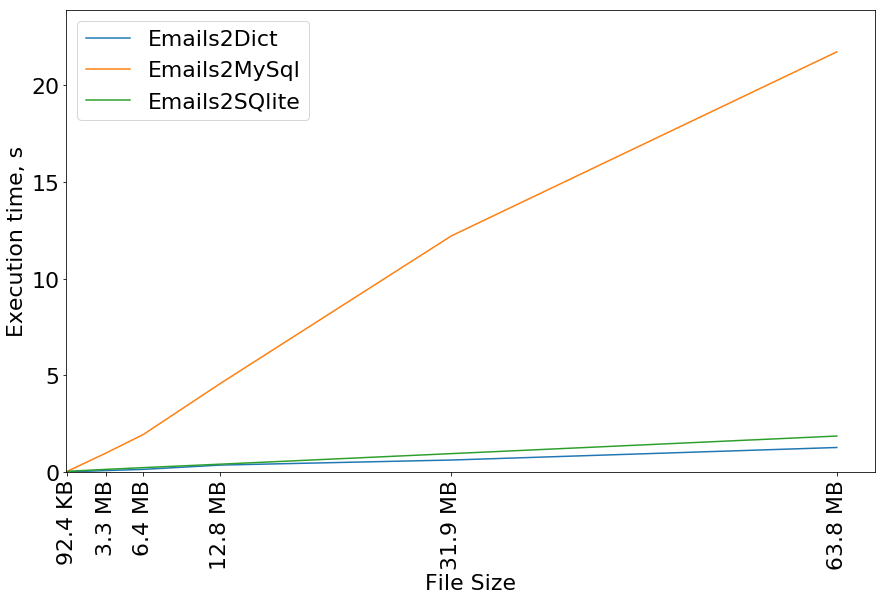

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

x_val=[os.path.getsize(file) for file in files]
labels=[convert_bytes(os.path.getsize(file)) for file in files]

plt.plot(x_val, test_dct, x_val, test_mysql, x_val, test_sqlite)
plt.xticks(x_val, labels, rotation=90)
#plt.ylim(0,max(counts.values())*1.1)
plt.ylim(0,max(max(test_dct),max(test_mysql), max(test_sqlite))*1.1)
plt.xlim(0, max(x_val)*1.05)
plt.legend(['Emails2Dict','Emails2MySql', 'Emails2SQlite'], loc='upper left')
plt.xlabel("File Size")
plt.ylabel("Execution time, s")
rcParams.update({'font.size': 22})
fig = plt.gcf()
fig.set_size_inches(14.5, 8.5)
plt.show()

## Week 3: Multi-table Relations: Audio Tracks Listing

In [ ]:
#create database tracks.db
CREATE TABLE `Artist` (
	`id`	INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
	`name`	TEXT
);

CREATE TABLE `Genre` (
	`id`	INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
	`name`	TEXT
);
CREATE TABLE `Album` (
	`id`	INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
	`artist_id` INTEGER,
	`title`	TEXT
);
CREATE TABLE `Album` (
	`id`	INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
	`title`	TEXT,
	`album_id` INTEGER,
	`genre_id` INTEGER,
	`len` INTEGER, `rating` INTEGER, `count` INTEGER
);
CREATE TABLE `Track` (
	`id`	INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
	`title`	TEXT,
	`album_id` INTEGER,
	`genre_id` INTEGER,
	`len` INTEGER, `rating` INTEGER, `count` INTEGER
);

## Brilliant SQL to get identical friend count in Follows table: twfriens.py

In [ ]:
    
'SELECT * FROM Follows JOIN People ON Follows.to_id=People.id WHERE Follows.from_id=2'
'SELECT * FROM Follows JOIN People ON Follows.to_id=People.id'

'''SElECT to_id, from_id, COUNT(to_id)
FROM Follows
GROUP BY to_id
HAVING COUNT(*) > 0'''

'''

SELECT Follows.*, People.*, COUNT(to_id) as 'Count' 
    FROM Follows JOIN People ON Follows.to_id=People.id 
    GROUP BY to_id 
    ORDER BY COUNT(to_id) DESC
'''



In [ ]:
#populating data
Insert into Artist (name) values ('Led Zepplin')
Insert into Artist (name) values ('AC/DC')

Insert into Genre (name) values ('Rock');
Insert into Genre (name) values ('Metal')

Insert into Album (title, artist_id) values ('Who Made Who', 2);
Insert into Album (title, artist_id) values ('IV', 1)

Insert into Track (title, rating, len, count, album_id, genre_id) values ('Black Dog', 5, 297, 0, 2, 1);
Insert into Track (title, rating, len, count, album_id, genre_id) values ('Stairway', 5, 482, 0, 2, 1);
Insert into Track (title, rating, len, count, album_id, genre_id) values ('About to Rock', 5, 313, 0, 1, 2);
Insert into Track (title, rating, len, count, album_id, genre_id) values ('Who Made Who', 5, 207, 0, 1, 2)

In [ ]:
#join clause
#relates albums to artists
select Album.title, Artist.name from Album join Artist on Album.artist_id = Artist.id
select Album.title, Artist.name, Album.artist_id, Artist.id from Album join Artist on Album.artist_id = Artist.id


#display track name and genre
select Track.title, Genre.name from Track join Genre on Track.genre_id=Genre.id
#Final Select Statement
select Track.title, Track.count, Artist.name as 'Artist', Album.title as 'Album', Genre.name as 'Genre' 
    from Track join Genre join Album join Artist 
    on Track.genre_id=Genre.id and Track.album_id=Album.id and Album.artist_id=Artist.id

### Book example: db1.py, db2.py

In [38]:
import sqlite3

conn = sqlite3.connect('music.sqlite')
cur = conn.cursor()

cur.execute('DROP TABLE IF EXISTS Tracks')
cur.execute('CREATE TABLE Tracks (title TEXT, plays INTEGER)')

cur.execute('INSERT INTO Tracks (title, plays) VALUES (?, ?)', ('Thunderstruck', 20))
cur.execute('INSERT INTO Tracks (title, plays) VALUES (?, ?)', ('My Way', 15))
conn.commit()

print('Tracks:')
cur.execute('SELECT title, plays FROM Tracks')
for row in cur:
    print(row)
    

#cur.execute('DELETE FROM Tracks WHERE plays < 100')

conn.close()

Tracks:
('Thunderstruck', 20)
('My Way', 15)


### Book example: twspider.py, twdump.py
When a blank line is given it stucks at the kaustubhyk  account, which throws an authorization error

Need to bypass this glitch

In [41]:
#twdump.py twitter database dumper
import sqlite3

conn=sqlite3.connect('spider.sqlite')
cur=conn.cursor()
cur.execute('SELECT * FROM Twitter ORDER BY friends DESC')
count=0
for row in cur:
    count+=1
    print(row)
print(count, 'rows.')

('TeamHandstand', 0, 2)
('gregfoot', 0, 2)
('kaustubhyk', 0, 2)
('GBCedarPark', 0, 2)
('MegoYugo', 0, 2)
('lonelyplanet', 1, 1)
('NatGeoTravel', 0, 1)
('PopSci', 0, 1)
('sciencemagazine', 0, 1)
('NatGeoPhotos', 0, 1)
10 rows.


In [13]:
from urllib.request import urlopen
import urllib.error
import twurl
import json
import sqlite3
import ssl


TWITTER_URL = 'https://api.twitter.com/1.1/friends/list.json'

conn = sqlite3.connect('spider.sqlite')
cur = conn.cursor()

cur.execute('''
            CREATE TABLE IF NOT EXISTS Twitter
            (name TEXT, retrieved INTEGER, friends INTEGER)''')
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

while True:
    acct = input('Enter a Twitter account, or quit: ')
    if (acct == 'quit'): break
    if (len(acct) < 1):
        cur.execute('SELECT name FROM Twitter  WHERE retrieved = 0  ORDER BY friends')
        
        try:
            acct = cur.fetchone()[0]
        except:
            print('No unretrieved Twitter accounts found')
            continue
    print("===",acct,"===")
    url = twurl.augment(TWITTER_URL, {'screen_name': acct, 'count': '50'})
    print('Retrieving', url)
    connection = urlopen(url, context=ctx)
    data = connection.read().decode()
    headers = dict(connection.getheaders())

    print('Remaining', headers['x-rate-limit-remaining'])
    js = json.loads(data)
    # Debugging
    # print json.dumps(js, indent=4)

    cur.execute('UPDATE Twitter SET retrieved=1 WHERE name = ?', (acct, ))

    countnew = 0
    countold = 0
    for u in js['users']:
        friend = u['screen_name']
        print(friend)
        cur.execute('SELECT friends FROM Twitter WHERE name = ? LIMIT 1',
                    (friend, ))
        try:
            count = cur.fetchone()[0]
            cur.execute('UPDATE Twitter SET friends = ? WHERE name = ?',
                        (count+1, friend))
            countold = countold + 1
        except:
            cur.execute('''INSERT INTO Twitter (name, retrieved, friends)
                        VALUES (?, 0, 1)''', (friend, ))
            countnew = countnew + 1
    print('New accounts=', countnew, ' revisited=', countold)
    conn.commit()

cur.close()

Enter a Twitter account, or quit: quit


In [11]:
conn=sqlite3.connect('spider.sqlite')
cur=conn.cursor()
cur.execute('SELECT * FROM Twitter ORDER BY friends DESC')
count=0
for row in cur:
    count+=1
    #print(row)
print(count, 'rows.')
cur.close()

712 rows.


### Book examples: twfriends.py - relational version of twspider

In [14]:
import urllib.request, urllib.parse, urllib.error
import twurl
import json
import sqlite3
import ssl

TWITTER_URL = 'https://api.twitter.com/1.1/friends/list.json'

conn=sqlite3.connect('friens.sqlite')
cur=conn.cursor()

cur.execute('''CREATE TABLE IF NOT EXISTS People
            (id INTEGER PRIMARY KEY, name TEXT UNIQUE, retrieved INTEGER)''')
cur.execute('''CREATE TABLE IF NOT EXISTS Follows
            (from_id INTEGER, to_id INTEGER, UNIQUE(from_id, to_id))''')

# Ignore SSL certificate errors
ctx=ssl.create_default_context()
ctx.check_hostname=False
ctx.verify_mode=ssl.CERT_NONE

while True:
    acct=input('Enter a Twitter account, or quit: ')
    if (acct == 'quit'): break
    if (len(acct)<1):
        cur.execute('SELECT id, name FROM People WHERE retrieved = 0 LIMIT 1')
        try:
            (id, acct)=cur.fetchone()
        except:
            print('No unretrieved Twitter accounts found')
    else:
        cur.execute('SELECT id FROM People WHERE name = ? LIMIT 1', (acct,))
        
        try:
            id=cur.fetchone()[0]
        except:
            cur.execute('''INSERT OR IGNORE INTO People
                        (name, retrieved) VALUES (?, 0)''', (acct,))
            conn.commit()
            if cur.rowcount !=1:
                print('Error inserting account:', acct)
                continue
            id=cur.lastrowid
    
    url=twurl.augment(TWITTER_URL, {'screen_name':acct, 'count':100})
    print('Retrieving account', acct)
    try:
        connection=urllib.request.urlopen(url, context=ctx)
    except Exception as err:
        print('Failed to Retrieve', err)
        break
    
    data=connection.read().decode()
    headers=dict(connection.getheaders())
    
    print('Renaiming', headers['x-rate-limit-remaining'])
    
    try:
        js=json.loads(data)
    except:
        print('Unable to parse json')
        print(data)
        break
    #Debugging
    #print(json.dumps(js,indent=4))
    
    if 'users' not in js:
        print('Incorrect JSON recieved')
        print(json.dumps(js, indent=4))
        continue
    
    cur.execute('UPDATE People SET retrieved=1 WHERE name=?', (acct,))
    
    countnew=0
    countold=0
    for u in js['users']:
        friend=u['screen_name']
        print(friend)
        cur.execute('SELECT id FROM People WHERE name = ? LIMIT 1', (friend,))
        
        try:
            friend_id=cur.fetchone()[0]
            countold=countold+1
        except:
            cur.execute('''INSERT OR IGNORE INTO People (name, retrieved) VALUES (?, 0)''', (friend,))
            conn.commit()
            if cur.rowcount!=1:
                print('Error inserting account:', friend)
                continue
            friend_id=cur.lastrowid
            countnew=countnew+1
            
        cur.execute('''INSERT OR IGNORE INTO Follows (from_id, to_id) VALUES (?,?)''', (id, friend_id))
    print('New accounts=', countnew, 'revisited=', countold)
    print('Remaining', headers['x-rate-limit-remaining'])
    conn.commit()
cur.close()
        
    
            

Enter a Twitter account, or quit: quit


In [3]:
#twjoin.py
import sqlite3
conn=sqlite3.connect("friens.sqlite")
cur=conn.cursor()

cur.execute("SELECT * FROM People")
count=0
print('People:')
for row in cur:
    if count<5: print(row)
    count+=1
print(count, "rows.")

cur.execute("SELECT * FROM Follows")
count=0
print('Follows:')
for row in cur:
    if count<5: print(row)
    count+=1
print(count, "rows.")
#all the friends of People.id=2
cur.execute("SELECT * FROM Follows JOIN People ON Follows.to_id=People.id WHERE Follows.from_id=2")

count=0
print('Connections for id=2:')
for row in cur:
    if count<5: print(row)
    count+=1
print(count, "rows.")
cur.close()

People:
(1, 'drchuck', 1)
(2, 'rameshsabeti', 1)
(3, 'lastmjs', 1)
(4, 'VanJones68', 1)
(5, 'ananavarro', 1)
729 rows.
Follows:
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
734 rows.
Connections for id=2:
(2, 102, 102, 'WeAreOneOC', 0)
(2, 103, 103, 'watkinsdani', 0)
(2, 104, 104, 'shoemoney', 0)
(2, 105, 105, 'BrandJournoCara', 0)
(2, 106, 106, 'cbezzy', 0)
50 rows.


## Brilliant SQL to get identical friend count in Follows table: twfriens.py

In [ ]:
    
'SELECT * FROM Follows JOIN People ON Follows.to_id=People.id WHERE Follows.from_id=2'
'SELECT * FROM Follows JOIN People ON Follows.to_id=People.id'

'''SElECT to_id, from_id, COUNT(to_id)
FROM Follows
GROUP BY to_id
HAVING COUNT(*) > 0'''

'''

SELECT Follows.*, People.*, COUNT(to_id) as 'Count' 
    FROM Follows JOIN People ON Follows.to_id=People.id 
    GROUP BY to_id 
    ORDER BY COUNT(to_id) DESC
'''

### Extended tracks.py: READING from XML

In [17]:
#create database tracks.db
'''CREATE TABLE `Artist` (
	`id`	INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
	`name`	TEXT UNIQUE
);

CREATE TABLE `Genre` (
	`id`	INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
	`name`	TEXT
);
CREATE TABLE `Album` (
	`id`	INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
	`artist_id` INTEGER,
	`title`	TEXT
);
CREATE TABLE `Album` (
	`id`	INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
	`title`	TEXT,
	`album_id` INTEGER,
	`genre_id` INTEGER,
	`len` INTEGER, `rating` INTEGER, `count` INTEGER
);
CREATE TABLE `Track` (
	`id`	INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
	`title`	TEXT,
	`album_id` INTEGER,
	`genre_id` INTEGER,
	`len` INTEGER, `rating` INTEGER, `count` INTEGER
);'''

'CREATE TABLE `Artist` (\n\t`id`\tINTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,\n\t`name`\tTEXT\n);\n\nCREATE TABLE `Genre` (\n\t`id`\tINTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,\n\t`name`\tTEXT\n);\nCREATE TABLE `Album` (\n\t`id`\tINTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,\n\t`artist_id` INTEGER,\n\t`title`\tTEXT\n);\nCREATE TABLE `Album` (\n\t`id`\tINTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,\n\t`title`\tTEXT,\n\t`album_id` INTEGER,\n\t`genre_id` INTEGER,\n\t`len` INTEGER, `rating` INTEGER, `count` INTEGER\n);\nCREATE TABLE `Track` (\n\t`id`\tINTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,\n\t`title`\tTEXT,\n\t`album_id` INTEGER,\n\t`genre_id` INTEGER,\n\t`len` INTEGER, `rating` INTEGER, `count` INTEGER\n);'

In [ ]:
#populating data
Insert into Artist (name) values ('Led Zepplin')
Insert into Artist (name) values ('AC/DC')

Insert into Genre (name) values ('Rock');
Insert into Genre (name) values ('Metal')

Insert into Album (title, artist_id) values ('Who Made Who', 2);
Insert into Album (title, artist_id) values ('IV', 1)

Insert into Track (title, rating, len, count, album_id, genre_id) values ('Black Dog', 5, 297, 0, 2, 1);
Insert into Track (title, rating, len, count, album_id, genre_id) values ('Stairway', 5, 482, 0, 2, 1);
Insert into Track (title, rating, len, count, album_id, genre_id) values ('About to Rock', 5, 313, 0, 1, 2);
Insert into Track (title, rating, len, count, album_id, genre_id) values ('Who Made Who', 5, 207, 0, 1, 2)

In [25]:
%%time
import xml.etree.ElementTree as ET
import sqlite3

conn=sqlite3.connect('trackdb1.sqlite')
cur=conn.cursor()

#Make some fresh tables using executescript()
cur.executescript('''
DROP TABLE IF EXISTS Artist;
DROP TABLE IF EXISTS Album;
DROP TABLE IF EXISTS Track;

CREATE TABLE `Artist` (
 `id` INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
 `name` TEXT UNIQUE
);

CREATE TABLE `Album` (
 `id` INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
 `artist_id` INTEGER,
 `title` TEXT UNIQUE
);

CREATE TABLE `Track` (
 `id` INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
 `title` TEXT UNIQUE,
 `album_id` INTEGER,
 `genre_id` INTEGER,
 `len` INTEGER, `rating` INTEGER, `count` INTEGER
);
''')

fname=input("Enter file name: ")
if(len(fname)<1):fname='Library.xml'
    
def lookup(d,key):#parsing the unusual xml style
    found = False
    for child in d:
        if found: return child.text
        if child.tag == 'key' and child.text == key:
            found = True
    return None

stuff=ET.parse(fname)
all=stuff.findall('dict/dict/dict')

for entry in all:
    if(lookup(entry,'Track ID') is None): continue
    name = lookup(entry, 'Name')
    artist=lookup(entry, 'Artist')
    album=lookup(entry, 'Album')
    count=lookup(entry, 'Play Count')
    rating=lookup(entry, 'Rating')
    length=lookup(entry, 'Total Time')
    
    if name is None or artist is None or album is None:
        continue
    
    #print(name, artist, album, count, rating, length)
    
    cur.execute('''INSERT OR IGNORE INTO Artist (name)
        VALUES ( ? )''', ( artist, ) )
    cur.execute('SELECT id from Artist WHERE name = ? ', (artist, ))
    artist_id=cur.fetchone()[0]
    
    cur.execute('''INSERT or IGNORE INTO Album (title, artist_id)
        VALUES ( ?, ? )''', ( album, artist_id ) )
    cur.execute('SELECT id FROM Album WHERE title = ? ', (album,))
    album_id = cur.fetchone()[0]
    
    #REPLACE isn't supported ewerywhere
    cur.execute('''INSERT OR REPLACE INTO Track
        (title, album_id, len, rating, count)
        VALUES ( ?, ?, ?, ?, ? )''',
        ( name, album_id, length, rating, count))
conn.commit()

Enter file name: 
Wall time: 1.8 s


In [ ]:
#basic select
"""
SELECT Track.*, Album.title, Artist.name 
FROM Track JOIN Album JOIN Artist
ON Track.album_id=Album.id and Album.artist_id=Artist.id
"""
#fancier select
'''SELECT Track.*, Album.title as 'Album', Artist.name as 'Artist'
FROM Track JOIN Album JOIN Artist
ON Track.album_id=Album.id and Album.artist_id=Artist.id
ORDER By Artist.name DESC'''
#calculates how much tracks there is in an album
"""SELECT Track.*, Album.title as 'Album', Artist.name as 'Artist', COUNT(Album.id) as 'Tracks in Album'
FROM Track JOIN Album JOIN Artist
ON Track.album_id=Album.id and Album.artist_id=Artist.id
GROUP BY Album.id"""
#calculates how much tracks there is of each artist
"""SELECT Track.*, Album.title as 'Album', Artist.name as 'Artist', COUNT(Artist.id) as 'Tracks of an Artist'
FROM Track JOIN Album JOIN Artist
ON Track.album_id=Album.id and Album.artist_id=Artist.id
GROUP BY Artist.id"""
#Who has more than one album?
'''SELECT Album.*, Count(Album.artist_id) as "#Albums" , Artist.name as 'Artist'
FROM Album JOIN Artist
ON Album.artist_id=Artist.id
GROUP BY Album.artist_id
Having("#Albums" > 1 )
ORDER By "#Albums" DESC'''

### Week3 assignment

In [44]:
%%time
import xml.etree.ElementTree as ET
import sqlite3

conn=sqlite3.connect('assignmentTrackDB.sqlite')
cur=conn.cursor()

#Make some fresh tables using executescript()
cur.executescript('''
DROP TABLE IF EXISTS Artist;
DROP TABLE IF EXISTS Album;
DROP TABLE IF EXISTS Track;
DROP TABLE IF EXISTS Genre;

CREATE TABLE Artist (
    id  INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    name    TEXT UNIQUE
);

CREATE TABLE Genre (
    id  INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    name    TEXT UNIQUE
);

CREATE TABLE Album (
    id  INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    artist_id  INTEGER,
    title   TEXT UNIQUE
);

CREATE TABLE Track (
    id  INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    title TEXT  UNIQUE,
    album_id  INTEGER,
    genre_id  INTEGER,
    len INTEGER, rating INTEGER, count INTEGER
);
''')

fname=input("Enter file name: ")
if(len(fname)<1):fname='Library.xml'
    
def lookup(d,key):#parsing the unusual xml style
    found = False
    for child in d:
        if found: return child.text
        if child.tag == 'key' and child.text == key:
            found = True
    return None

stuff=ET.parse(fname)
all=stuff.findall('dict/dict/dict')

for entry in all:
    if(lookup(entry,'Track ID') is None): continue
    name = lookup(entry, 'Name')
    artist=lookup(entry, 'Artist')
    album=lookup(entry, 'Album')
    count=lookup(entry, 'Play Count')
    rating=lookup(entry, 'Rating')
    length=lookup(entry, 'Total Time')
    genre=lookup(entry, 'Genre')
    
    if name is None or artist is None or album is None:
        continue
    
    #print(name, artist, album, count, rating, length)
    
    if genre is None:
        genre='N/A'
    cur.execute('''INSERT OR IGNORE INTO Genre (name) 
        VALUES ( ? )''', (genre,))
    cur.execute('SELECT id from Genre WHERE name = ?', (genre,))
    genre_id=cur.fetchone()[0]
    
    cur.execute('''INSERT OR IGNORE INTO Artist (name)
        VALUES ( ? )''', ( artist, ) )
    cur.execute('SELECT id from Artist WHERE name = ? ', (artist, ))
    artist_id=cur.fetchone()[0]
    
    cur.execute('''INSERT or IGNORE INTO Album (title, artist_id)
        VALUES ( ?, ? )''', ( album, artist_id ) )
    cur.execute('SELECT id FROM Album WHERE title = ? ', (album,))
    album_id = cur.fetchone()[0]
    
    #REPLACE isn't supported ewerywhere
    cur.execute('''INSERT OR REPLACE INTO Track
        (title, album_id, genre_id, len, rating, count)
        VALUES ( ?, ?, ?, ?, ?, ? )''',
        ( name, album_id, genre_id, length, rating, count))
conn.commit()



Enter file name: 
Wall time: 2.71 s


In [45]:
cur.execute('''SELECT Track.title, Artist.name, Album.title, Genre.name 
    FROM Track JOIN Genre JOIN Album JOIN Artist 
    ON Track.genre_id = Genre.ID and Track.album_id = Album.id 
        AND Album.artist_id = Artist.id
    ORDER BY Artist.name LIMIT 5''')

for row in cur.fetchall():
    print(row)
conn.close()

('For Those About To Rock (We Salute You)', 'AC/DC', 'Who Made Who', 'Rock')
('Hells Bells', 'AC/DC', 'Who Made Who', 'Rock')
('Shake Your Foundations', 'AC/DC', 'Who Made Who', 'Rock')
('You Shook Me All Night Long', 'AC/DC', 'Who Made Who', 'Rock')
('Who Made Who', 'AC/DC', 'Who Made Who', 'Rock')


## Week 4: many-to-many relationship

### making use of a connection table

In [46]:
"""
CREATE TABLE User (
    id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    name TEXT,
    email TEXT
);

CREATE TABLE Course (
    id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    title TEXT
);

CREATE TABLE Member (
    user_id INTEGER,
    course_id INTEGER,
    role INTEGER,
    PRIMARY KEY (user_id, course_id)
);

CREATE TABLE RoleDesc (
    id INTEGER PRIMARY KEY UNIQUE,
    description TEXT
);


INSERT INTO User (name, email) VALUES ('Jane' , 'jane@tsugi.org');
INSERT INTO User (name, email) VALUES ('Ed' , 'ed@tsugi.org');
INSERT INTO User (name, email) VALUES ('Sue' , 'sue@tsugi.org');

INSERT INTO Course (title) VALUES ('Python');
INSERT INTO Course (title) VALUES ('SQL');
INSERT INTO Course (title) VALUES ('PHP');

INSERT INTO RoleDesc (id, description) VALUES (0, 'Student');
INSERT INTO RoleDesc (id, description) VALUES (1, 'Instructor');

INSERT INTO Member (user_id, course_id, role) VALUES (1, 1, 1);
INSERT INTO Member (user_id, course_id, role) VALUES (2, 1, 0);
INSERT INTO Member (user_id, course_id, role) VALUES (3, 1, 0);

INSERT INTO Member (user_id, course_id, role) VALUES (1, 2, 0);
INSERT INTO Member (user_id, course_id, role) VALUES (2, 2, 1);

INSERT INTO Member (user_id, course_id, role) VALUES (2, 3, 1);
INSERT INTO Member (user_id, course_id, role) VALUES (3, 3, 0);
"""
#basic retrieval
'''
SELECT User.name, Member.role, Course.title, 
FROM User JOIN Member JOIN Course
ON Member.user_id=User.id AND Member.course_id=Course.id
ORDER BY Course.title, Member.role DESC, User.name
'''
#fancier retrieval : role as text
'''SELECT User.name, RoleDesc.description, Course.title
FROM User JOIN Member JOIN Course JOIN RoleDesc
ON Member.user_id=User.id AND Member.course_id=Course.id AND Member.role=RoleDesc.id
ORDER BY Course.title, Member.role DESC, User.name'''

"\nCREATE TABLE User (\n    id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,\n    name TEXT,\n    email TEXT\n);\n\nCREATE TABLE Course (\n    id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,\n    title TEXT\n);\n\nCREATE TABLE Member (\n    user_id INTEGER,\n    course_id INTEGER,\n    role INTEGER,\n    PRIMARY KEY (user_id, course_id)\n);\n\n\nINSERT INTO User (name, email) VALUES ('Jane' , 'jane@tsugi.org');\nINSERT INTO User (name, email) VALUES ('Ed' , 'ed@tsugi.org');\nINSERT INTO User (name, email) VALUES ('Sue' , 'sue@tsugi.org');\n\nINSERT INTO Course (title) VALUES ('Python')\nINSERT INTO Course (title) VALUES ('SQL')\n"

### Week 4 assignment: roster

Instructions

This application will read roster data in JSON format, parse the file, and then produce an SQLite database that contains a User, Course, and Member table and populate the tables from the data file.

You can base your solution on this code: http://www.py4e.com/code3/roster/roster.py - this code is incomplete as you need to modify the program to store the role column in the Member table to complete the assignment.

Each student gets their own file for the assignment. Download this file and save it as roster_data.json. Move the downloaded file into the same folder as your roster.py program.

Once you have made the necessary changes to the program and it has been run successfully reading the above JSON data, run the following SQL command:

SELECT hex(User.name || Course.title || Member.role ) AS X FROM 
    User JOIN Member JOIN Course 
    ON User.id = Member.user_id AND Member.course_id = Course.id
    ORDER BY X

Find the first row in the resulting record set and enter the long string that looks like 53656C696E613333.

In [7]:
import json
import sqlite3

conn = sqlite3.connect('rosterdb.sqlite')
cur = conn.cursor()

# Do some setup
cur.executescript('''
DROP TABLE IF EXISTS User;
DROP TABLE IF EXISTS Member;
DROP TABLE IF EXISTS Course;

CREATE TABLE User (
    id     INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    name   TEXT UNIQUE
);

CREATE TABLE Course (
    id     INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    title  TEXT UNIQUE
);

CREATE TABLE Member (
    user_id     INTEGER,
    course_id   INTEGER,
    role        INTEGER,
    PRIMARY KEY (user_id, course_id)
)
''')

fname = input('Enter file name: ')
if len(fname) < 1:
    fname = 'roster_data.json'

# [
#   [ "Charley", "si110", 1 ],
#   [ "Mea", "si110", 0 ],

str_data = open(fname).read()
json_data = json.loads(str_data)

for entry in json_data:

    name = entry[0];
    title = entry[1];
    role = entry[-1];

    print((name, title, role))

    cur.execute('''INSERT OR IGNORE INTO User (name) 
        VALUES ( ? )''', ( name, ) )
    cur.execute('SELECT id FROM User WHERE name = ? ', (name, ))
    user_id = cur.fetchone()[0]

    cur.execute('''INSERT OR IGNORE INTO Course (title) 
        VALUES ( ? )''', ( title, ) )
    cur.execute('SELECT id FROM Course WHERE title = ? ', (title, ))
    course_id = cur.fetchone()[0]

    cur.execute('''INSERT OR REPLACE INTO Member
        (user_id, course_id, role) VALUES ( ?, ?, ? )''', 
        ( user_id, course_id, role ) )

    conn.commit()

Enter file name: 
('Gene', 'si110', 1)
('Nontando', 'si110', 0)
('Leone', 'si110', 0)
('Leo', 'si110', 0)
('Aili', 'si110', 0)
('Muriel', 'si110', 0)
('Kirstin', 'si110', 0)
('Muhammed', 'si110', 0)
('Lockey', 'si110', 0)
('Douglas', 'si110', 0)
('Sukhveer', 'si110', 0)
('Abbie', 'si110', 0)
('Balqees', 'si110', 0)
('Ken', 'si110', 0)
('Cali', 'si110', 0)
('Mariena', 'si110', 0)
('Jenson', 'si110', 0)
('Juliet', 'si110', 0)
('Pearce', 'si110', 0)
('Meenal', 'si110', 0)
('Sami', 'si110', 0)
('Tessa', 'si110', 0)
('Nico', 'si110', 0)
('Sabina', 'si110', 0)
('Harris', 'si110', 0)
('Zita', 'si110', 0)
('Abhisumant', 'si110', 0)
('Brea', 'si110', 0)
('Amara', 'si110', 0)
('Ferre', 'si110', 0)
('Naila', 'si110', 0)
('Carson', 'si110', 0)
('Denzel', 'si110', 0)
('Alora', 'si110', 0)
('Deagan', 'si110', 0)
('Rozerin', 'si106', 1)
('Arianna', 'si106', 0)
('Mirryn', 'si106', 0)
('Kieran', 'si106', 0)
('Davie', 'si106', 0)
('Angali', 'si106', 0)
('Norrie', 'si106', 0)
('Niki', 'si106', 0)
('Anees

In [8]:
cur.execute('''
SELECT hex(User.name || Course.title || Member.role ) AS X FROM 
    User JOIN Member JOIN Course 
    ON User.id = Member.user_id AND Member.course_id = Course.id
    ORDER BY X
''')

In [10]:
for row in cur.fetchall():
    print(row)
conn.close()

ProgrammingError: Cannot operate on a closed database.